In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [3]:
path = '/Users/tanvik/Downloads/letters.csv'

In [4]:
df = pd.read_csv(path)

In [12]:
df.head()

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [15]:
df.sum(axis=0)

label        187179
pixel43        7197
pixel44        6908
pixel92       50099
pixel124    1177846
pixel125    1515569
pixel126    1793986
pixel127    1935877
pixel128    1870783
pixel129    1635838
pixel130    1300520
pixel131     962201
pixel132     624492
pixel133     365048
pixel134     191133
pixel135      88195
pixel136      35228
pixel137       8516
pixel138       1490
pixel146     149423
pixel147     300297
pixel148     542982
pixel149     899635
pixel150    1353318
pixel151    1905267
pixel152    2527389
pixel153    3150444
pixel154    3624449
pixel155    3846702
pixel156    3756912
pixel157    3372709
pixel158    2762003
pixel159    2085207
pixel160    1444401
pixel327    3725369
pixel328    2712678
pixel329    1783364
pixel351    4289213
pixel410    4522726
pixel411    3349523
pixel412    2365222
pixel413    1648275
pixel414    1081679
pixel415     624062
pixel416     245468
pixel417      34845
dtype: int64

In [16]:
df.isna().sum()

label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64

In [18]:
df.shape

(42000, 46)

In [44]:
Y_train = df["label"]
X_train = df.drop(labels = ["label"], axis = 1)

In [45]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((42000, 45), (8400, 9, 5, 1), (42000,), (8400, 10))

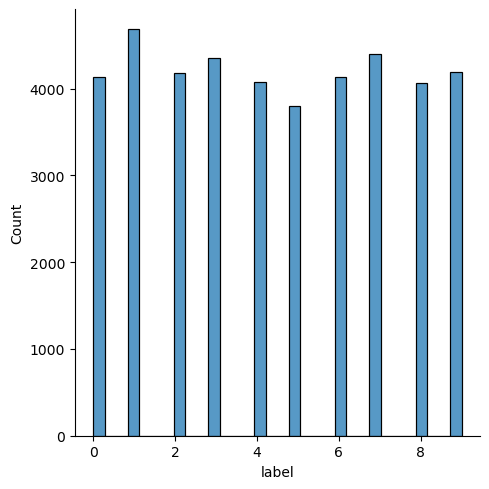

In [48]:
sns.displot(Y_train);

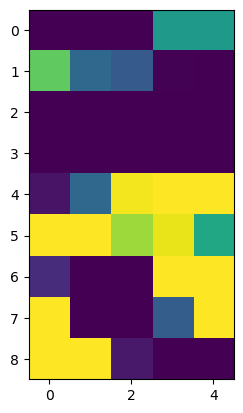

In [88]:
plt.imshow(X_train.loc[1].values.reshape((9, 5)))
plt.show()

In [97]:
Y_train = df["label"]
X_train = df.drop(labels = ["label"], axis = 1)

In [99]:
X_train,X_vali, y_train, y_vali = train_test_split(X_train,
                                                   Y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)

print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(33600, 45) (8400, 45) (33600,) (8400,)


In [102]:
import time
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

ans_k = 0

k_range = range(1, 20)
scores = []

for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_vali)
    accuracy = accuracy_score(y_vali,y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))  
    print(confusion_matrix(y_vali, y_pred))  
    
    print("Complete time: " + str(end-start) + " Secs.")

k = 1 begin 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       837
           1       0.82      0.90      0.86       987
           2       0.59      0.55      0.57       805
           3       0.48      0.48      0.48       857
           4       0.57      0.53      0.55       802
           5       0.54      0.54      0.54       787
           6       0.83      0.85      0.84       874
           7       0.41      0.45      0.43       832
           8       0.51      0.49      0.50       772
           9       0.39      0.35      0.37       847

    accuracy                           0.61      8400
   macro avg       0.60      0.60      0.60      8400
weighted avg       0.60      0.61      0.60      8400

[[705   1  43   2  21   5  21  12   9  18]
 [  0 884   7  13  21  16   6   4  29   7]
 [ 43  22 445 101  17  25  25  35  68  24]
 [ 15  19  85 413  21  82  13  41 142  26]
 [ 18  52  11  17 429  43  24 111  20  77]
 [  8  26  27

In [5]:
Y_train = df["label"]
X_train = df.drop(labels = ["label"], axis = 1)

In [6]:
#Normalizing data for CNN
X_train = X_train / 255.0

In [7]:
X_train = X_train.values.reshape(-1,9,5,1)

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
print(X_train.shape)
print(Y_train.shape)

(42000, 9, 5, 1)
(42000, 10)


In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.20, random_state=2)

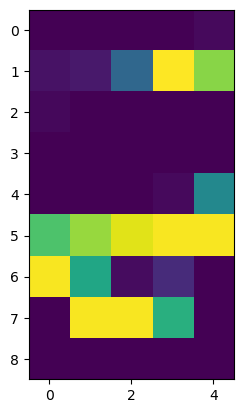

In [11]:
g = plt.imshow(X_train[1][:,:,0])

In [13]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (9,5,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

Metal device set to: Apple M1 Pro


2022-12-10 19:36:38.902990: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-10 19:36:38.903167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 5, 64)          1664      
                                                                 
 batch_normalization (BatchN  (None, 9, 5, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 5, 64)          102464    
                                                                 
 batch_normalization_1 (Batc  (None, 9, 5, 64)         256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 2, 64)         0         
 )                                                               
                                                        

In [115]:
from keras.optimizers import RMSprop,Adam

In [17]:
#optimizer = Adam(learning_rate=0.001 , beta_1=0.9 ,beta_2 = 0.999)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [18]:
model.compile(optimizer=optimizer , loss=['categorical_crossentropy'],metrics = ['accuracy'])

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience = 3 ,
                                            verbose = 1,
                                            factor = 0.5 , 
                                            min_lr = 0.00001)

In [23]:
epochs = 30
batch_size = 100

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

#datagen.fit(X_train)
train_gen = datagen.flow(X_train,Y_train, batch_size=batch_size)

In [25]:
history = model.fit(train_gen,
                              epochs = epochs,validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],
                             validation_steps = X_val.shape[0] // batch_size)

Epoch 1/30
336/336 - 7s - loss: 1.0008 - accuracy: 0.6448 - val_loss: 1.0109 - val_accuracy: 0.6538 - lr: 0.0010 - 7s/epoch - 20ms/step
Epoch 2/30
336/336 - 7s - loss: 0.9965 - accuracy: 0.6453 - val_loss: 1.0167 - val_accuracy: 0.6506 - lr: 0.0010 - 7s/epoch - 20ms/step
Epoch 3/30
336/336 - 7s - loss: 1.0008 - accuracy: 0.6407 - val_loss: 0.9563 - val_accuracy: 0.6608 - lr: 0.0010 - 7s/epoch - 20ms/step
Epoch 4/30
336/336 - 7s - loss: 0.9897 - accuracy: 0.6448 - val_loss: 0.9954 - val_accuracy: 0.6502 - lr: 0.0010 - 7s/epoch - 20ms/step
Epoch 5/30
336/336 - 7s - loss: 0.9848 - accuracy: 0.6510 - val_loss: 1.0184 - val_accuracy: 0.6457 - lr: 0.0010 - 7s/epoch - 20ms/step
Epoch 6/30
336/336 - 7s - loss: 0.9857 - accuracy: 0.6484 - val_loss: 1.0239 - val_accuracy: 0.6532 - lr: 0.0010 - 7s/epoch - 20ms/step
Epoch 7/30
336/336 - 7s - loss: 0.9764 - accuracy: 0.6517 - val_loss: 1.0187 - val_accuracy: 0.6490 - lr: 0.0010 - 7s/epoch - 20ms/step
Epoch 8/30
336/336 - 7s - loss: 0.9782 - accurac

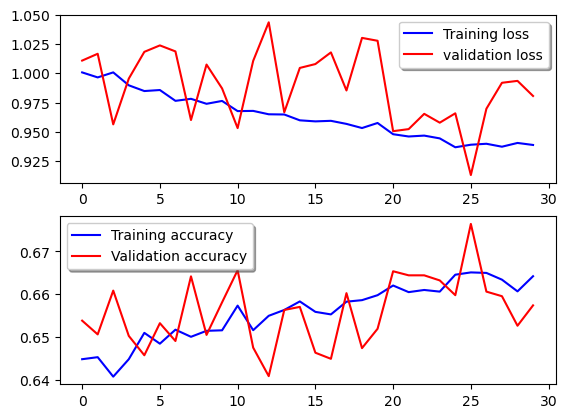

In [26]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label');

2022-12-11 12:04:11.159994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


263/263 [==============================] - 1s 3ms/step


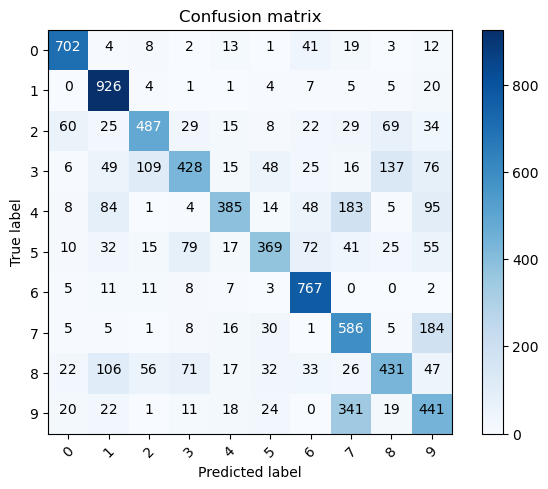

In [28]:

Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10)) 

263/263 [==============================] - 1s 3ms/step
The predicted label is: 2


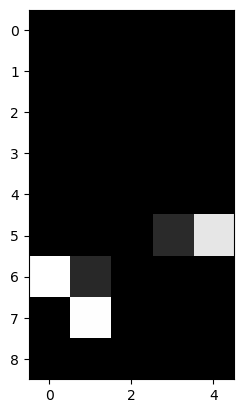

In [41]:
plt.imshow(X_val[1678][:,:,0],cmap='gray')
print("The predicted label is:" ,model.predict(X_val).argmax(axis=1)[24])

263/263 [==============================] - 1s 3ms/step
The predicted label is: 2


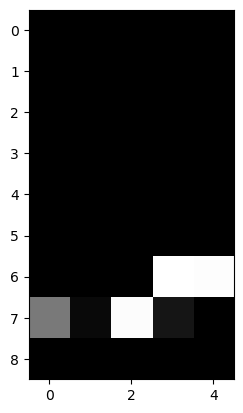

In [42]:
plt.imshow(X_train[1678][:,:,0],cmap='gray')
print("The predicted label is:" ,model.predict(X_val).argmax(axis=1)[24])